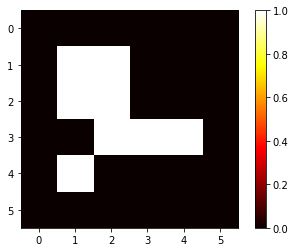

In [12]:
from linear_equations import *
n = 6
D = get_matrix_D(n)
t = get_vector_t()
vector_one = np.ones(n*n)
t_ = t - np.dot(D, vector_one)/320/40
A = (1/2880 - 1/320) * D
# 最小二乘解出x
x1 = np.linalg.lstsq(A, t, rcond=None)[0]
for i in range(n*n):
    if abs(x1[i]) >= 0.5*(max(abs(x1))-min(abs(x1))):
        x1[i] = 1
    else:
        x1[i] = 0

import matplotlib.pyplot as plt
import numpy as np

# x1 = abs(x1)

plt.imshow(x1.reshape(n,n), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

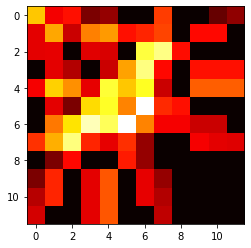

In [4]:
import prob_alg
import matplotlib.pyplot as plt
import numpy as np

# 考虑 m % b == 0, 且 6 // b == 0
n = 12
b = 3
P = prob_alg.get_P(n, b)
P = P.reshape(n, n)

# plt.imshow(P>P.mean()+0.1, cmap='hot', interpolation='nearest')
plt.imshow(P, cmap='hot', interpolation='nearest')
# plt.colorbar()
import os 
if not os.path.exists('../image'):
    os.mkdir('../image')
plt.savefig(f'../image/prob_{n}_{b}.png', bbox_inches='tight', pad_inches=0)

迭代次数: 9


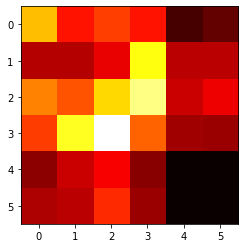

In [2]:
import prob_alg
import matplotlib.pyplot as plt
import numpy as np

# 考虑 m % b == 0, 且 6 // b == 0
n = 6
b = 3
_, P0, P = prob_alg.get_P_iter(n,b, 1e-10)
P = P.reshape(n, n)

def top_k_elements(arr, k):
    flattened_arr = arr.flatten()  # 将2维数组展平为1维数组
    sorted_indices = np.argsort(flattened_arr)  # 对展平后的数组进行排序，并获取排序后的索引

    result = np.zeros_like(flattened_arr)  # 创建一个与展平数组大小相同的全零数组
    result[sorted_indices[-k:]] = 1  # 将排序后的最大的k个元素设置为1

    result = result.reshape(arr.shape)  # 将1维数组重新变为2维数组
    return result

print(f"迭代次数: {_}")
plt.imshow(P, cmap='hot', interpolation='nearest')
# plt.colorbar()
plt.savefig(f'../image/prob_iter_{n}_{b}.png', bbox_inches='tight', pad_inches=0)


In [3]:
import prob_alg
prob_alg.get_line_red_all().mean() * 36

9.510890788666828

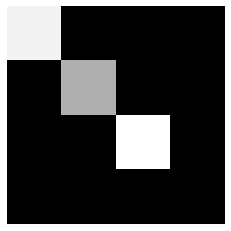

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def filtered_backprojection(sinogram, angles):
    num_angles = len(angles)
    num_detectors = sinogram.shape[0]
    num_pixels = sinogram.shape[1]
    
    reconstructed_image = np.zeros((num_pixels, num_pixels))
    center = num_pixels // 2
    
    for angle_idx in range(num_angles):
        angle = angles[angle_idx]
        projection = sinogram[:, angle_idx]
        
        for detector_idx in range(num_detectors):
            detector_pos = detector_idx - num_detectors // 2
            theta = np.deg2rad(angle)
            x = center + detector_pos * np.sin(theta)
            y = center + detector_pos * np.cos(theta)
            
            for pixel_idx in range(num_pixels):
                pixel_pos = pixel_idx - center
                r = np.sqrt((pixel_pos - x)**2 + (center - y)**2)
                if r > 0:
                    weight = 1 / r
                    reconstructed_image[pixel_idx, pixel_idx] += weight * projection[detector_idx]
    
    return reconstructed_image

# 示例数据
num_pixels = 36
num_detectors = 180
num_angles = 4
angles = np.linspace(0, 180, num_angles, endpoint=False)
sinogram = np.random.rand(num_detectors, num_angles)
plt.imshow(sinogram, cmap='gray')
plt.axis('off')
plt.show()

# 使用滤波反投影法重建图像
reconstructed_image = filtered_backprojection(sinogram, angles)

# 显示重建结果
plt.imshow(reconstructed_image, cmap='gray')
plt.axis('off')
plt.show()

# (ref)[https://blog.csdn.net/qq_33414271/article/details/78128813]
